# 5. 势和场

## 5.1 拉普拉斯方程和松弛算法

在一个没有包含任何电荷的3维空间中，描述电场的函数$V(x, y, z)$满足方程

$$
\nabla^2 V \equiv \frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = 0.
$$

这就是著名的拉普拉斯方程。这是一个2阶线性齐次的偏微分方程(PDE)，边界条件被给定的时候（比如$V$在边界上的值），一般情况下我们可以求得这个方程的解。

相比于我们之前遇到过的常微分方程，这种偏微分方程更难求解。我们之前学习过的欧拉方法或者欧拉--柯尔莫方法，都无法被直接应用在此类方程中。


因此，我们需要寻找其他的数值方法来对这种方程进行求解。我们将尝试使用“松弛（relaxation）”方法，来求解这种方程。

跟之前我们解决问题的方式很类似，我们首先依然需要把空间离散化。面对这个三维空间，我们依然可以选择最简单的离散化方式：
$x = i \Delta x $, $y = j \Delta y$, $z = k \Delta z$。其中$i$, $j$ 和$k$可以自由的取0到某个正整数$N$之间的值，而$\Delta x$, $\Delta y $, $\Delta z$和以前的$\Delta t$一样，是我们计算中所涉及到的最小的空间微元。而我们感兴趣空间的物理大小，就对应了一个长宽高分别为$N \Delta x$, $N \Delta y$, $N \Delta z$的立方体。

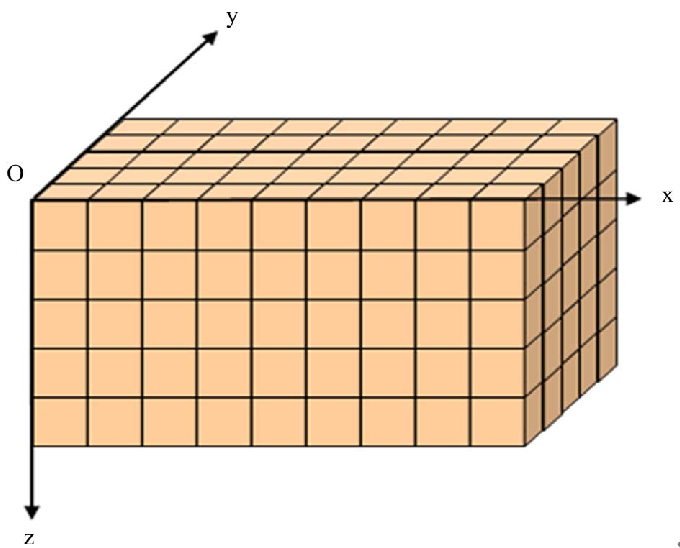

而我们的目标，就是基于这种离散化的方式，在我们感兴趣的这个有限大小的立方体（如果是二维版本的问题，就是在一个有限大小的矩形，见下图）内，在格点上，找到一组满足边界条件的$V(i, j, k) \equiv V(i \Delta x, j \Delta y, k \Delta z)$。

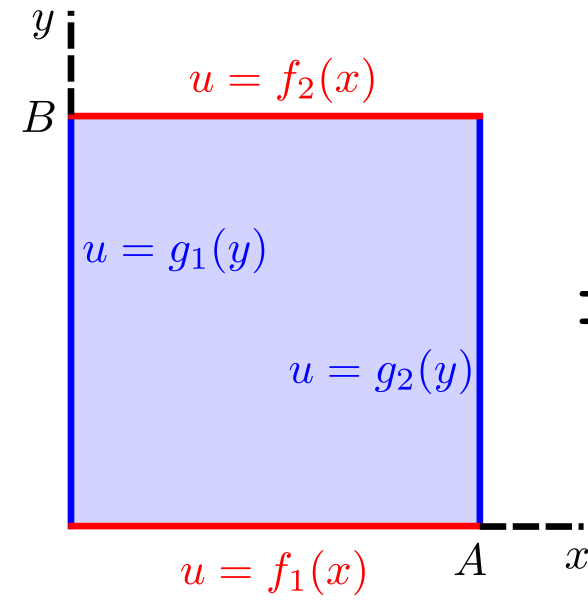

类比之前我们对时间进行类似的离散化之后，就可以把对时间的导数写成离散化的形式。在这里，我们也可以几乎一摸一样的把偏导数也写成离散化的形式，利于，对于$x$的偏导数，我们有

$$
\frac{\partial V}{ \partial x}\bigg \vert_{x = i \Delta x} \approx \frac{V(i + 1, j, k) - V(i, j, k)}{\Delta x}
$$

当然，也和我们之前提到过的一样，对导数的计算的方式绝非唯一，对于这样的导数计算，我们也可以使用

$$
\frac{\partial V}{ \partial x}\bigg \vert_{x = i \Delta x} \approx \frac{V(i , j, k) - V(i-1, j, k)}{\Delta x}。
$$
通过观察，我们可以发现，这两种求导方式貌似偏向右，一个偏向左。

我们之前提到过，这种对导数的计算往往有着$\mathcal{O}(\Delta x^2)$的误差。下面我们将介绍另一个同样简单，但是有着$\mathcal{O}(\Delta x^3)$的误差的求导方式：

$$
\frac{\partial V}{ \partial x}\bigg \vert_{x = i \Delta x} \approx \frac{V(i+1 , j, k) - V(i-1, j, k)}{2 \Delta x}
$$

(思考一下为何这种求导方式拥有$\mathcal{O}(\Delta x^3)$的误差)。对于$x$和$y$方向上的求导，我们可以类似进行。

对于二阶导数，我们可以简单的假设存在两个“虚拟”的坐标点$i+1/2$和$i - 1/2$，而二阶导可以被定义为
$$
\frac{\partial^2 V}{\partial x^2} \approx \frac{1}{\Delta x} \left[\frac{\partial V(i + \frac12) }{\partial x} - \frac{\partial V(i - \frac12)}{\partial x} \right]
$$

进一步在坐标点$i+1/2$和$i - 1/2$求导，我们可以得到下面这样的二阶导数的算法：
$$
\frac{\partial^2 V}{\partial x^2} \approx  \frac{1}{\Delta x} \left[\frac{V(i+1, j, k) - V(i, j,k)}{\Delta x} - \frac{V(i, j, k) - V(i-1, j,k)}{\Delta x}\right]
$$

合并化简之后，我们最终得到：

$$
\frac{\partial^2 V}{\partial x^2} \approx  \frac{V(i+1, j, k) + V(i-1, j, k) - 2V(i, j,k)}{\Delta x^2} 
$$

这样的二阶导数的表达式具有很好的关于$(i, j, k)$的对称性。如果在拉普拉斯方程

$$
\frac{\partial^2 V}{\partial x^2} + \frac{\partial^2 V}{\partial y^2} + \frac{\partial^2 V}{\partial z^2} = 0.
$$

中，带入该二阶导数表达式，整理后我们可以得到这样的一个表达式：

$$
V(i, j, k) = \frac{1}{6} \left[V(i+1, j, k) + V(i-1, j, k) + V(i, j+1, k) + V(i, j-1, k) + V(i, j, k+1) + V(i, j, k-1)\right]
$$

注意，这并不是一个递推关系，而事实上告诉我们，函数$V$在任意格点$(i, j, k)$的值，等于其6个（上下左右前后）相邻格点函数值的平均。

所以，我们现在把拉普拉斯方程的求解问题，简化成寻找一个三位数组的值的问题，这个三维数组需要满足两个条件：

1. 在任意格点$(i, j, k)$的值，等于其6个（上下左右前后）相邻格点函数值的平均。
2. 满足限定的边界条件。

其实，解决这个问题的方法，可能比我们想象的要简单！

我们仅仅可以通过不断的迭代上面这个公式，往往会发现，我们就可以不断的接近那个正确答案。

具体的说，我们可以从一个满足边界条件的试探解$V_0$出发，不断迭代上面那个表达式，同时始终保证边界条件的满足，往往可以在很多次的迭代后，得到我们“想要的答案”。而这种方法叫做“雅可比方法”。

那么，什么是我们“想要的答案”？具体地说，我们可以给定一个“阈值”，当解的误差小于我们所设定的“阈值”时，我们认为我们已经得到了满意的解，从而停止迭代。而如果在进行很多步迭代之后，或者每一步迭代之后，函数$V$的变化不大时，求解的误差还是大于我们所设定的“阈值”，我们

### 5.1.1 求解电势分布

下面，让我们具体来看这样一个简化版本的二维问题：两个金属板在$x=\pm 1$的位置放置，且分别具有$+1$和$-1$的电势（在这些问题中，我们暂时忽略掉物理单位）。在$y=\pm 1$位置，电势线性变化（作为边界条件）。

如何通过求解拉普拉斯方程来得到这个区域的电势分布？

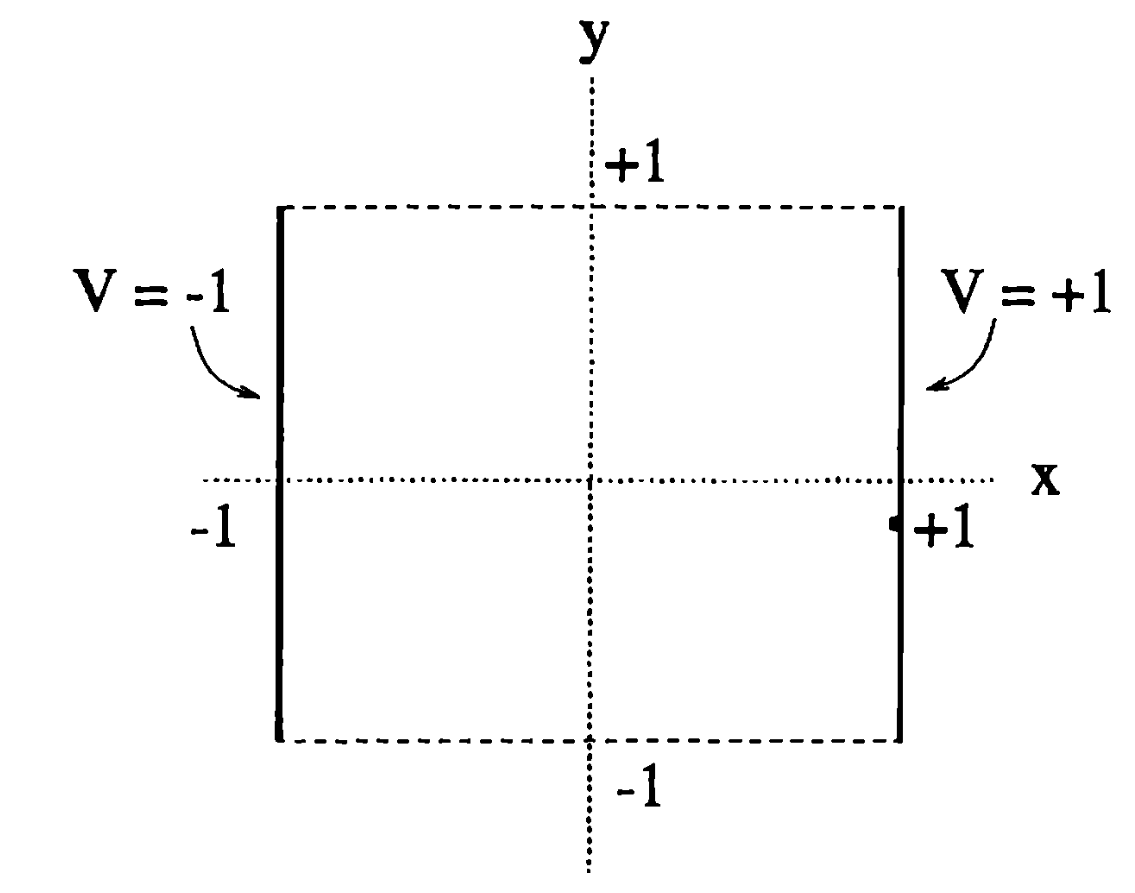

这里，我们使用雅可比方法。程序实现上我们分为两个函数，其中一个函数`update_V`用来实现**一次**迭代，函数`exam_V`来验证当前的$V$是否是一个我们能接受的解，并返回误差大小，然后使用函数`solve`不断调用函数`update_V`，直到总体的误差小于给定的阈值

In [162]:
import numpy as np
def update_V(V, n):
# V为(n+1)*(n+1)的矩阵，边界在0 和 n上
    V_new = V.copy()
    for i in range(1, n+1):
        for j in range(1, n+1):
            V_new[i, j] = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1]) / 4
    return V_new

def exam_V(V, L, n):
# 计算在所有格点的误差的平均值
    err = 0
    dx = L / (n+1)
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            sol = (V[i+1, j] + V[i-1, j] - 2 * V[i, j] + V[i, j + 1] + V[i, j -1] - 2 * V[i, j]) / dx**2
            err += np.abs(sol)
    return err / n**2
    
def solve(L, n, tar_prec=1e-2, max_iter=10, debug=False):

    prec = 1e100
    V = np.zeros((n+2, n+2))
    #设置边界条件

    for i in range(0, n+2):
        V[i, 0] = -1
        V[i, n+1] = 1
    V[0, :] = np.linspace(-1, 1, n+2)
    V[n+1, :] = np.linspace(-1, 1, n+2)

    # 记录迭代总次数
    n_iter = 0
    
    # 开始使用雅可比方法迭代
    while(prec > tar_prec):
        
        prec = exam_V(V, L, n)

        if(debug == True):
            np.set_printoptions(suppress=True)
            print('第'+str(n_iter)+'次迭代得到的误差为 ' + str(prec) + '， 当前函数为')
            print(np.array_str(V, precision=2))
        
        V = update_V(V, n)
        n_iter += 1
        if(n_iter > max_iter):
            break
            
    if(prec > tar_prec):
        print('经历了' + str(n_iter) + '次迭代之后, 达到精度'+ str(prec) + ',仍没有达到目标精度，停止迭代')
    else:
        print('经历了' + str(n_iter) + '次迭代之后, 成功达到目标精度！')
    return V

我们首先看一下我们设置的初始条件（把`max_iter`设置为0）：

In [163]:
solve(2, 5, 1e-1, max_iter=0, debug=True);

第0次迭代得到的误差为 5.04， 当前函数为
[[-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]]
经历了1次迭代之后, 达到精度5.04,仍没有达到目标精度，停止迭代


随后，我们尝试进行$10$次迭代，并令`debug=True`从而能输出每一次迭代之后的结果

In [167]:
solve(L=2, n=5, tar_prec=1e-1, max_iter=10, debug=True);

第0次迭代得到的误差为 5.04， 当前函数为
[[-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.    0.    0.    0.    0.    0.    1.  ]
 [-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]]
第1次迭代得到的误差为 3.06， 当前函数为
[[-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]
 [-1.   -0.42 -0.08  0.    0.08  0.42  1.  ]
 [-1.   -0.25  0.    0.    0.    0.25  1.  ]
 [-1.   -0.25  0.    0.    0.    0.25  1.  ]
 [-1.   -0.25  0.    0.    0.    0.25  1.  ]
 [-1.   -0.42 -0.08  0.    0.08  0.42  1.  ]
 [-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]]
第2次迭代得到的误差为 2.025， 当前函数为
[[-1.   -0.67 -0.33  0.    0.33  0.67  1.  ]
 [-1.   -0.5  -0.19 -0.    0.19  0.5   1.  ]
 [-1.   -0.42 -0.08  0.    0.08  0.42  1.  ]
 [-1.   -0.38 -0.06  0.    0.06  0.38  1.  ]
 [-1.   -0.42 -0.08  0.    0.08  0.42  1.  ]
 [-1.   -0.5  -0.19 -0.    0.19  0.5   1.  ]
 [-1.   -0.67 -0.33  0.  

我们会发现，解会通过迭代过程，逐渐熟练到我们期望得到的结果！

这一类通过迭代而试我们的答案越来越接近于标准答案的方式，我们也称为“松弛算法”。

另外，聪明的你可能已经意识到了，我们给定的边界条件，正好对应了无限长的平行板电容器内部的电势分布（考虑到场强$E$在无限大平行板电容器内部处处相等！）。如果这个问题过于简单，接下来我们可以尝试考虑一个“稍微”复杂一点的问题--有限大平行板电容器的电势。

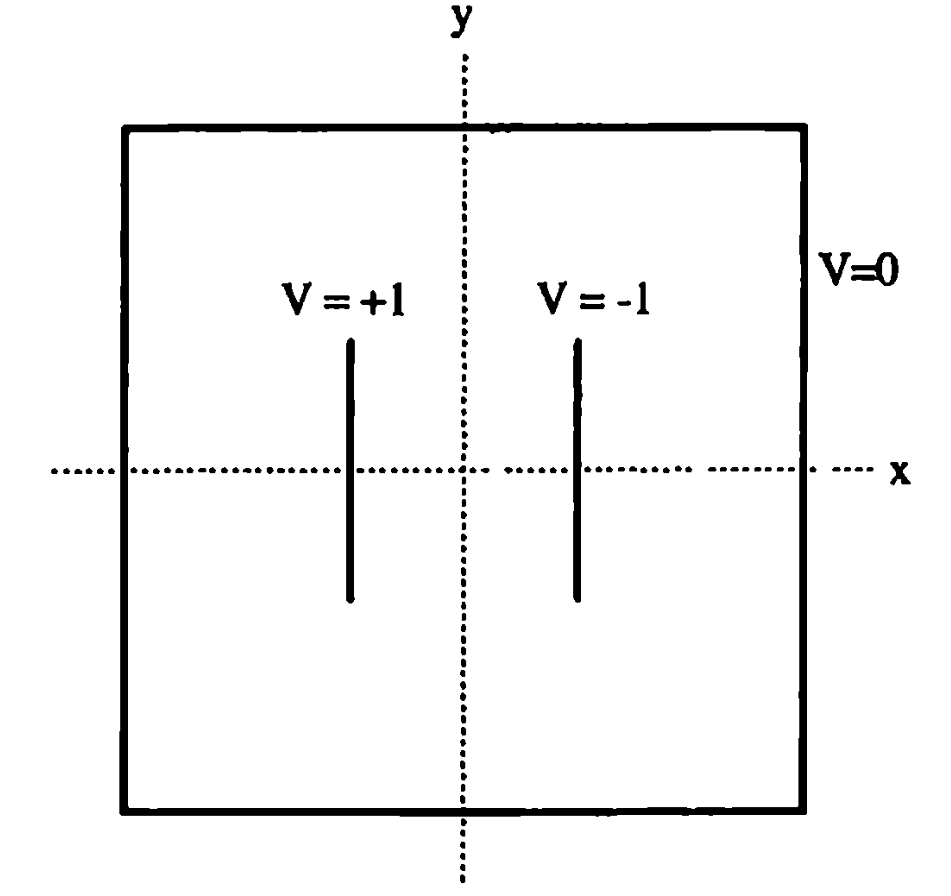

考虑如图所示一对有限大无限薄的平行板电容器，但在z方向无限长，所以空间中的电势分布可以用二维拉普拉斯方程描述。两板施加初始电势$\pm 1$，尽管电势按照定义只在无穷远处为0，但我们显然不能够使用无穷大的计算空间。

因此，让我们暂定计算区域为一个从$x=\pm 1$到$y=\pm 1$的正方形区域，两个板子的长度为$0.5$，距离为$0.5$。让我们修改刚才写的雅可比迭代程序来计算在此种边界条件下的电势。

In [193]:
import numpy as np
def update_V(V, n, on_left_plate, on_right_plate):
# V为(n+1)*(n+1)的矩阵，边界在0 和 n上
    V_new = V.copy()
    for i in range(1, n+1):
        for j in range(1, n+1):
            if (on_left_plate[i, j] == False and on_right_plate[i, j] == False):
                V_new[i, j] = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1]) / 4

    return V_new

def exam_V(V, L, n, on_left_plate, on_right_plate):
# 计算在所有格点的误差的平均值
    err = 0
    dx = L / (n+1)
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            if(on_left_plate[i, j] == False and on_right_plate[i, j] == False):
                sol = (V[i+1, j] + V[i-1, j] - 2 * V[i, j] + V[i, j + 1] + V[i, j -1] - 2 * V[i, j]) / dx**2
                err += np.abs(sol)
    return err / n**2
    
def solve(L, n, tar_prec=1e-2, max_iter=10, debug=False):

    prec = 1e100
    V = np.zeros((n+2, n+2))

    on_left_plate = np.zeros((n+2, n+2), dtype=bool)
    on_right_plate = np.zeros((n+2, n+2), dtype=bool)
    
    #设置平行板电势作为另一组边界条件
    dx = L / (n+1)
    l_i = int(np.ceil(0.75 / dx))
    r_i = int(np.ceil(1.25 / dx))
    for i in range(1, n+1):
        if( -1 + i * dx < 0.25 and -1 + i * dx > -0.25):
            on_left_plate[i,l_i] = True
            on_right_plate[i,r_i] = True

    V[on_left_plate] = -1
    V[on_right_plate] = 1

    # 记录迭代总次数
    n_iter = 0
    
    # 开始使用雅可比方法迭代
    while(prec > tar_prec):
        
        prec = exam_V(V, L, n, on_left_plate, on_right_plate)

        if(debug == True):
            np.set_printoptions(suppress=True)
            print('第'+str(n_iter)+'次迭代得到的误差为 ' + str(prec) + '， 当前函数为')
            print(np.array_str(V, precision=2))
        
        V = update_V(V, n,on_left_plate, on_right_plate)
        n_iter += 1
        if(n_iter > max_iter):
            break
            
    if(prec > tar_prec):
        print('经历了' + str(n_iter) + '次迭代之后, 达到精度'+ str(prec) + ',仍没有达到目标精度，停止迭代')
    else:
        print('经历了' + str(n_iter) + '次迭代之后, 成功达到目标精度！')
    return V

这次我们依然是首先看一下我们设置的初始条件（把`max_iter`设置为0）：

In [176]:
solve(2, 8, 1e-1, max_iter=0, debug=True);

第0次迭代得到的误差为 2.53125， 当前函数为
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
经历了1次迭代之后, 达到精度2.53125,仍没有达到目标精度，停止迭代


再试试多次迭代

In [177]:
solve(2, 8, 1e-1, max_iter=10, debug=True);

第0次迭代得到的误差为 2.53125， 当前函数为
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
第1次迭代得到的误差为 1.58203125， 当前函数为
[[ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   -0.25  0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.   -0.25 -1.    0.    1.    0.25  0.    0.  ]
 [ 0.    0.    0.   -0.25 -1.    0.    1.    0.25  0.    0.  ]
 [ 0.    0.    0.    0.   -0.25  0.    0.25  0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.   

当然，解决这个复杂问题，$n=8$这个分辨率显然不够，我们尝试把分辨率提高到64

In [159]:
V = solve(2, 64, 1e-1, max_iter=1000, debug=False)

对于$V$这种二维函数，一种常见的可视化方法是画出其所对应的“热力图”

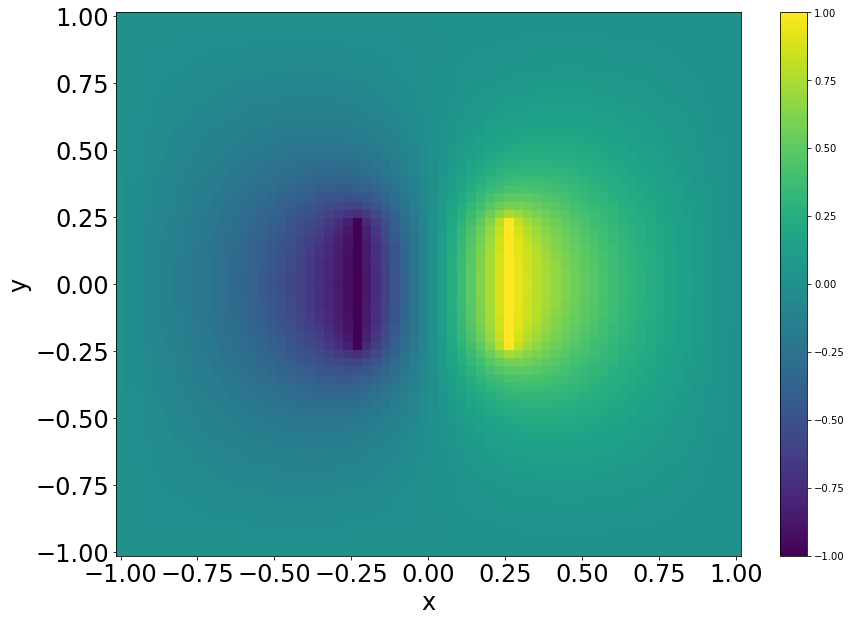

In [178]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))

# 绘制热力图
plt.pcolormesh(np.linspace(-1,1,64+2), np.linspace(-1,1,64+2), V)

plt.colorbar()
plt.xlabel('x', fontsize=24)
    # 加入y轴标记
plt.ylabel('y', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

当然，对于电势，等势线往往是更好的可视化方法。用Python也可以很简单的绘制等势线：

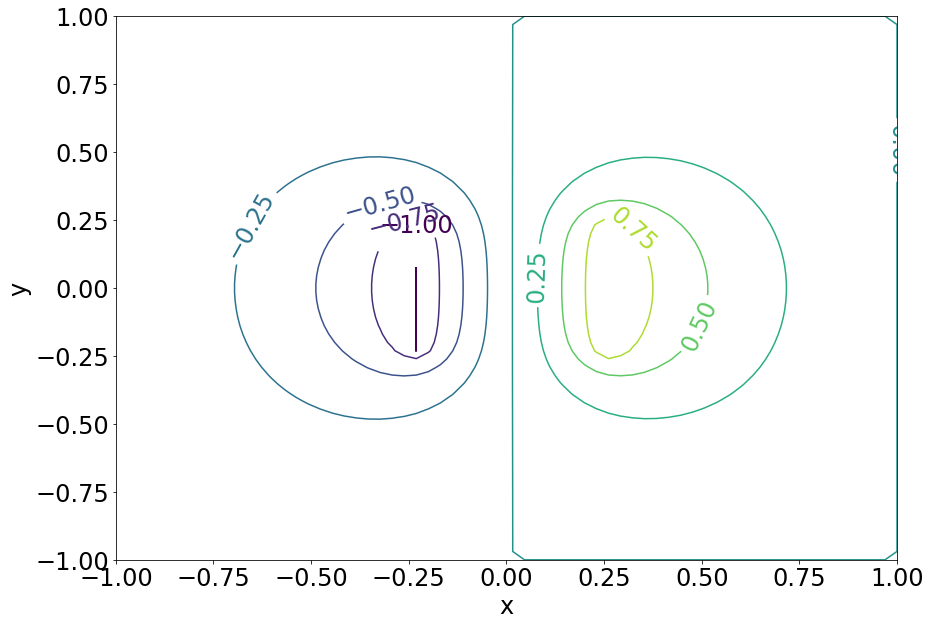

In [161]:
X, Y = np.meshgrid(np.linspace(-1,1,64+2), np.linspace(-1,1,64+2))

# 绘制等势线图
plt.figure(figsize=(14,10))
contour = plt.contour(X, Y, V)
plt.clabel(contour, fontsize=24)

plt.xlabel('x', fontsize=24)
plt.ylabel('y', fontsize=24)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.show()

### 5.1.2 松弛算法的收敛速度

那么，松弛算法收敛到正确解的速度是怎样的？我们可以做下面这个实验。

我们首先把目标误差统一设置为$0.1$,然后看一下在不同分辨率之下，需要多少步才能得到这样的误差。

In [180]:
# 分辨率n=16
solve(L=2, n=16, tar_prec=1e-1, max_iter=10000, debug=False);

经历了58次迭代之后, 成功达到目标精度！


In [181]:
# 分辨率n=32
solve(L=2, n=32, tar_prec=1e-1, max_iter=10000, debug=False);

经历了213次迭代之后, 成功达到目标精度！


In [182]:
# 分辨率n=64
solve(L=2, n=64, tar_prec=1e-1, max_iter=10000, debug=False);

经历了816次迭代之后, 成功达到目标精度！


我们会发现，达到相同精度所需要的迭代次数，大致正比于$n^2$（如果是3维的拉普拉斯方程，大致正比于$n^3$）。所以可见，在高分辨率的前提下，算法的复杂度相对较高！

那么，我们有没有可能提高雅可比方法的收敛速度呢？

我们可以回忆一下我们在欧拉--柯尔莫方法中学到的技巧。其实类似的技巧也可以用到雅可比方法中。

我们在雅可比方法中使用的迭代方式， 可以被理解为
$$
V_{\rm new}(i, j) = \frac{1}{4} \left[V_{\rm old}(i+1, j) + V_{\rm old}(i-1, j) + V_{\rm old}(i, j+1) + V_{\rm old}(i, j-1) \right].
$$
即，每一步迭代都基于使用上一步的迭代结果。而根据我们在欧拉--柯尔莫方法中学到的经验，如果每一步迭代中，尽量使用这一步迭代所得到新的值，可能会得到更好的精度。

基于这种思想，我们或许可以使用这样的迭代方式：
$$
V_{\rm new}(i, j) = \frac{1}{4} \left[V_{\rm old}(i+1, j) + V_{\rm new}(i-1, j) + V_{\rm old}(i, j+1) + V_{\rm new}(i, j-1) \right].
$$

这种迭代方式，叫做“高斯--赛德尔迭代”。

我们只需要简单修改之前的`update_V`函数，就是使用新的高斯--赛德尔迭代：

In [195]:
# 使用gauss--seidel 迭代
def update_V(V, n, on_left_plate, on_right_plate):
# V为(n+1)*(n+1)的矩阵，边界在0 和 n上
    V_new = V.copy()
    for i in range(1, n+1):
        for j in range(1, n+1):
            if (on_left_plate[i, j] == False and on_right_plate[i, j] == False):
                V_new[i, j] = (V_new[i-1, j] + V[i+1, j] + V_new[i, j-1] + V[i, j+1]) / 4
            
    return V_new


In [196]:
# 分辨率n=64
solve(L=2, n=64, tar_prec=1e-1, max_iter=10000, debug=False);

经历了410次迭代之后, 成功达到目标精度！


我们会发现，相比之前的800多次的迭代次数，高斯--塞德尔方法的效率有了2倍的提高。



事实上，还存在一些能够进一步加速松弛算法的方案，但我们在这门课里不去讨论。感兴趣的同学可以查找资料，自行学习。其中一种很常见的算法叫做“过松弛（simutaneous over relaxation）”算法。

另一种同样很常用的方法叫做“multi-grid”方法。